<h1>Práctica 3</h1>

<i>
Maximiliano Vaca Montejano <br>
364897 <br>
maximiliano.vaca@uabc.edu.mx
</i>

<i>Profesor: Andrés García Medina <br>
andres.garcia.medina@uabc.edu.mx <br>
Fecha de entrega: jueves 14 de marzo, 2024 (12pm).</i>

<h2>Ejercicio 1 </h2>
Resuelva los siguientes problemas conceptuales:

:D

<h2>Ejercicio 2 </h2>

Considere los datos en R denominados <i>InsectSprays</i>, los cuales contienen recuentos
de insectos en cada una de varias parcelas. Cada una de las parcelas
ha sido rociada con un insecticida distinto. Un modelo para estos datos podría ser:
$$ y_i = μ + β_j $$
$$μ = NOmedia$$
$$μ \sim β_0$$
*falta el epsilon* <br>
$$ y_i = μ + β_j + \epsilon_i$$
mejor: 
$$ y_i = \alpha + β_j + \epsilon_i$$
si la parcela $i$ ha sido rociada con el spray $j$

In [2]:
data(InsectSprays)
head(InsectSprays)

#descripcion de los datos
str(InsectSprays)

,count,spray
,<dbl>,<fct>
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A


'data.frame':	72 obs. of  2 variables:
 $ count: num  10 7 20 14 14 12 10 23 17 20 ...
 $ spray: Factor w/ 6 levels "A","B","C","D",..: 1 1 1 1 1 1 1 1 1 1 ...


<b>(a)</b> ¿Cuantos factores y niveles tiene el conjunto de datos? Se puede apoyar en el comando $as.factor$

In [3]:
as.factor(InsectSprays$spray)

[1] A A A A A A A A A A A A B B B B B B B B B B B B C C C C C C C C C C C C D D
[39] D D D D D D D D D D E E E E E E E E E E E E F F F F F F F F F F F F
Levels: A B C D E F

* la variable $spray$ es $1$ factor en $6$ niveles

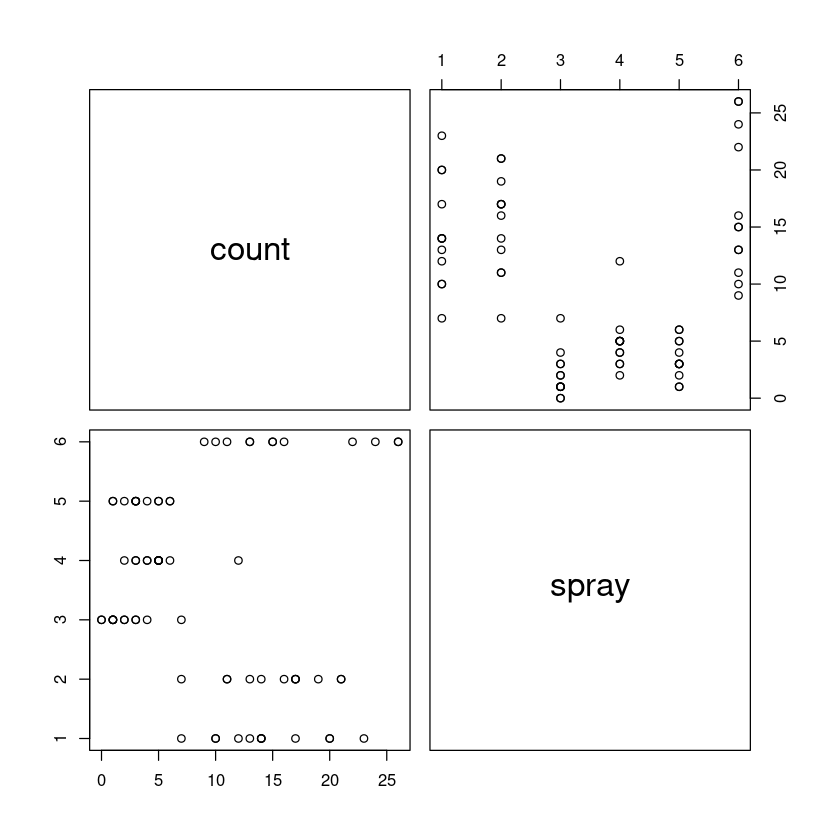

In [4]:
pairs(InsectSprays)

<b>(b)</b> Ajuste un modelo lineal propuesto para determinar si el tipo de insecticida
determina el conteo de insectos, y en dado caso en que medida.
¿Cual insecticida tiene mayor impacto en la disminución del numero de
mosquitos?

$$ y_i = \alpha + β_j + \epsilon_i$$
si la parcela $i$ ha sido rociada con el spray $j$

In [5]:
#ajuste del modelo
model_1 <- lm(count ~ spray, data = InsectSprays)
summary(model_1)
coef(model_1)


Call:
lm(formula = count ~ spray, data = InsectSprays)

Residuals:
   Min     1Q Median     3Q    Max 
-8.333 -1.958 -0.500  1.667  9.333 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.5000     1.1322  12.807  < 2e-16 ***
sprayB        0.8333     1.6011   0.520    0.604    
sprayC      -12.4167     1.6011  -7.755 7.27e-11 ***
sprayD       -9.5833     1.6011  -5.985 9.82e-08 ***
sprayE      -11.0000     1.6011  -6.870 2.75e-09 ***
sprayF        2.1667     1.6011   1.353    0.181    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.922 on 66 degrees of freedom
Multiple R-squared:  0.7244,	Adjusted R-squared:  0.7036 
F-statistic:  34.7 on 5 and 66 DF,  p-value: < 2.2e-16


(Intercept)      sprayB      sprayC      sprayD      sprayE      sprayF 
 14.5000000   0.8333333 -12.4166667  -9.5833333 -11.0000000   2.1666667

In [6]:
#ordenar los coeficientes de mayor a menor 
coef(model_1)[order(abs(coef(model_1)),decreasing = T)]

(Intercept)      sprayC      sprayE      sprayD      sprayF      sprayB 
 14.5000000 -12.4166667 -11.0000000  -9.5833333   2.1666667   0.8333333

* El modelo propuesto es:
$$ count = 14.5 + 0.83 * sprayB - 12.42 * sprayC - 9.58 * sprayD - 11.0 * sprayE + 2.17 * sprayF $$
* el cual es significativo debido al valor pequeño del $p-value$ <br>
* donde el $incecticida \hspace{1mm} E$ tiene el mayor impacto en la disminución del numero de mosquitos, ademas de con un nivel de significancia de $***$, aunque no muy por detrás queda el $incecticida \hspace{1mm} C$ 

In [7]:
X <- model.matrix(count ~ spray, data=InsectSprays)
y <- InsectSprays$count

dim(X)
head(X)
#tail(X)

[1] 72  6

,(Intercept),sprayB,sprayC,sprayD,sprayE,sprayF
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0
6,1,0,0,0,0,0


<b>(c)</b> Determine el tipo impacto que tiene el spray A sobre el conteo de mosquitos
usando como base el nivel F. <br>Hint: Use la función relevel

In [8]:
#cambiamos el nivel de referencia a F
InsectSprays$spray <- relevel(InsectSprays$spray, ref = "F")

#modelo
model_2 <- lm(count ~ spray, data = InsectSprays)
summary(model_2)


Call:
lm(formula = count ~ spray, data = InsectSprays)

Residuals:
   Min     1Q Median     3Q    Max 
-8.333 -1.958 -0.500  1.667  9.333 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16.667      1.132  14.721  < 2e-16 ***
sprayA        -2.167      1.601  -1.353    0.181    
sprayB        -1.333      1.601  -0.833    0.408    
sprayC       -14.583      1.601  -9.108 2.79e-13 ***
sprayD       -11.750      1.601  -7.339 4.04e-10 ***
sprayE       -13.167      1.601  -8.223 1.05e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.922 on 66 degrees of freedom
Multiple R-squared:  0.7244,	Adjusted R-squared:  0.7036 
F-statistic:  34.7 on 5 and 66 DF,  p-value: < 2.2e-16


* cambiando el nivel de referencia a $F$, el $spray A$ tiene un impacto de $-2.167$, aunque con un $p-value$ de $0.181$, no creo que sea una estimacion significativa
* otra observacion es que, en este caso, el $incecticida \hspace{1mm} C$ tiene el mayor impacto en la disminución del numero de mosquitos, aunque no por mucho por delante del $incecticida \hspace{1mm} E$, el cual habiamos obtenido anteriormente.

<b>(d)</b> Analice el ajuste del modelo a través de los cuantiles de los residuales
con apoyo de la función qnorm. Compare su gráfico con los que se obtienen
por defecto mediante la función lm.

<i>"Este gráfico compara los cuantiles de los residuales del modelo con los cuantiles de una distribución normal estándar. Si los residuales están normalmente distribuidos, los puntos en el gráfico Q-Q deberían aproximarse a una línea recta."

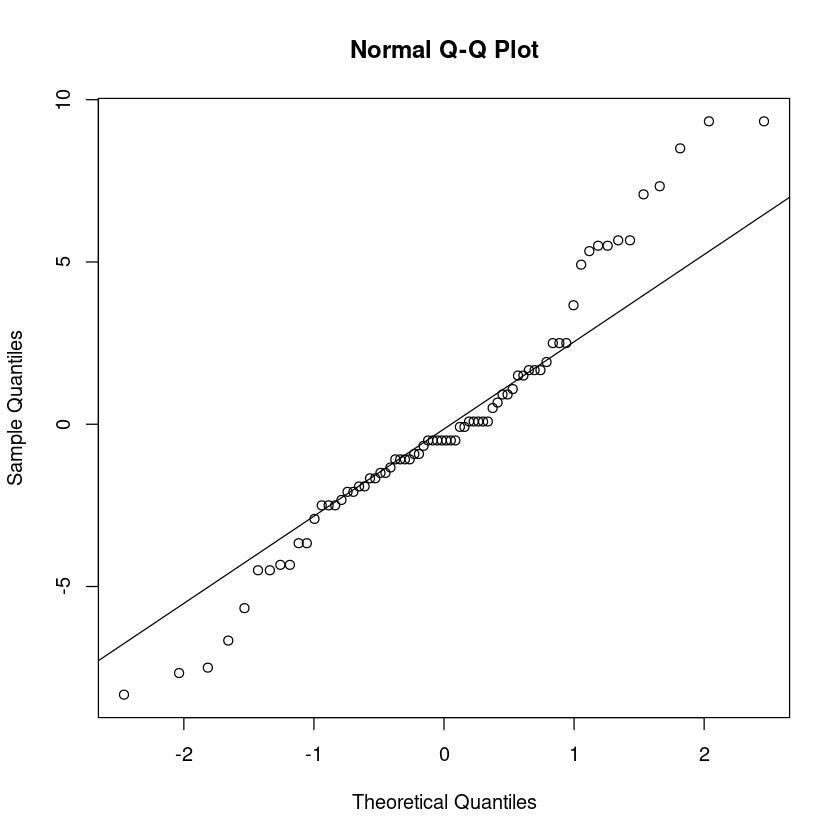

In [9]:
#guardamos residuales
residuals <- resid(model_1)

#grafico Q-Q de los residuales
qqnorm(residuals)
qqline(residuals) #linea de referencia

$plot(model)$ muestra:  
1. Residuales contra ajustes
2. Gráfico Q-Q de los residuales
3. Escala-ubicación (que es la raíz cuadrada de los residuales estandarizados contra ajustes)
4. Residuales contra orden de influencia

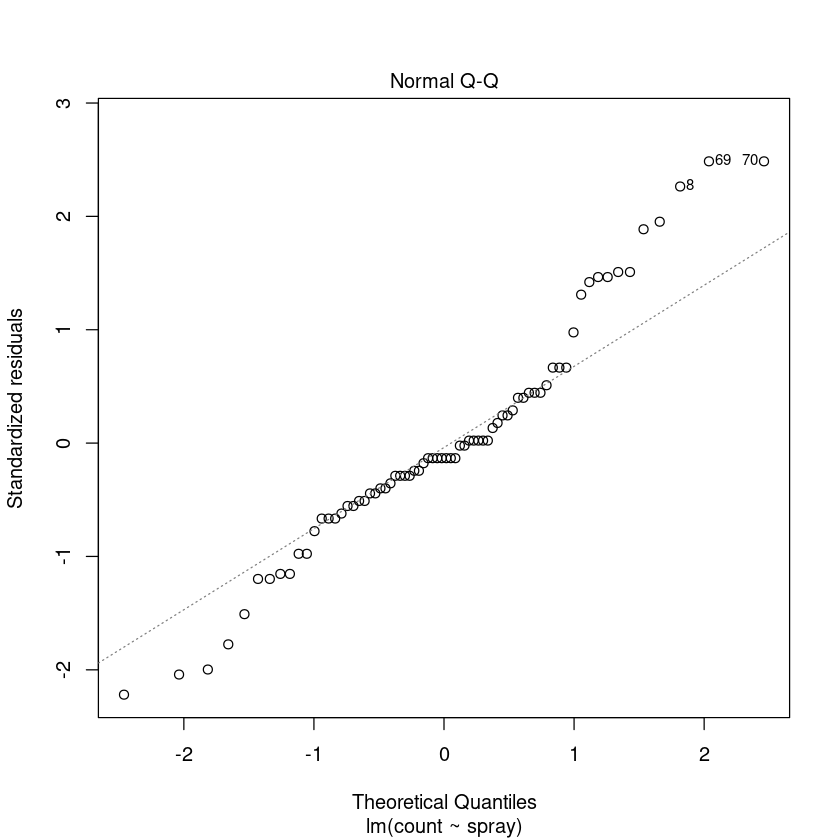

In [11]:
#plot(model)
plot(model_1, which = 2)

* ambos graficos son iguales

<b>(e)</b> Omita los posibles datos atipicos y vuelva a ajustar el modelo. 
Considere como datos atipicos a las observaciones sugeridas por los graficos
de diagnostico de la funcion lm.

In [14]:
# Calcular los residuales estandarizados
standardized_residuals <- rstandard(model_1)

#analizamos 
range(standardized_residuals)

#omitimos residuales atipicos
outliers <- abs(standardized_residuals) > 1 # mayor a 2 no sirvió mucho, tomando como referencia los graficos 
outliers

#dataframe sin los datos atípicos
InsectSprays_no_outliers <- InsectSprays[!outliers, ]

[1] -2.219302  2.485618

1     2     3     4     5     6     7     8     9    10    11    12    13 
 TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
 TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE 
   66    67    68    69    70    71    72 
FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE

In [15]:
#modelo sin datos atipicos
model_no_outliers <- lm(count ~ spray, data = InsectSprays_no_outliers)
summary(model_no_outliers)


Call:
lm(formula = count ~ spray, data = InsectSprays_no_outliers)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1429 -1.0682  0.0000  0.8571  3.0000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.4000     0.6909  20.843  < 2e-16 ***
sprayA       -0.4000     0.9355  -0.428   0.6709    
sprayB        1.7429     0.9046   1.927   0.0602 .  
sprayC      -12.7636     0.8332 -15.318  < 2e-16 ***
sprayD      -10.1273     0.8332 -12.154 5.79e-16 ***
sprayE      -10.9000     0.8223 -13.255  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.545 on 46 degrees of freedom
Multiple R-squared:  0.9392,	Adjusted R-squared:  0.9326 
F-statistic: 142.1 on 5 and 46 DF,  p-value: < 2.2e-16


* comparamos graficas antes y despues de quitar outliers (esto se estuvo haciendo repetidamente para determinar el valor maximo permitido de std residuals)

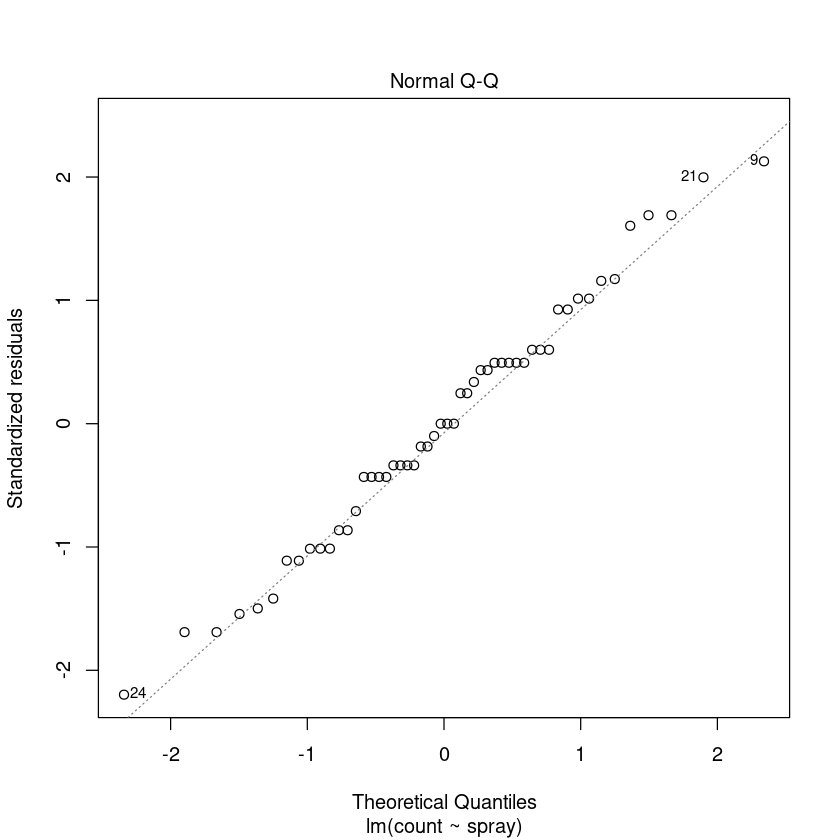

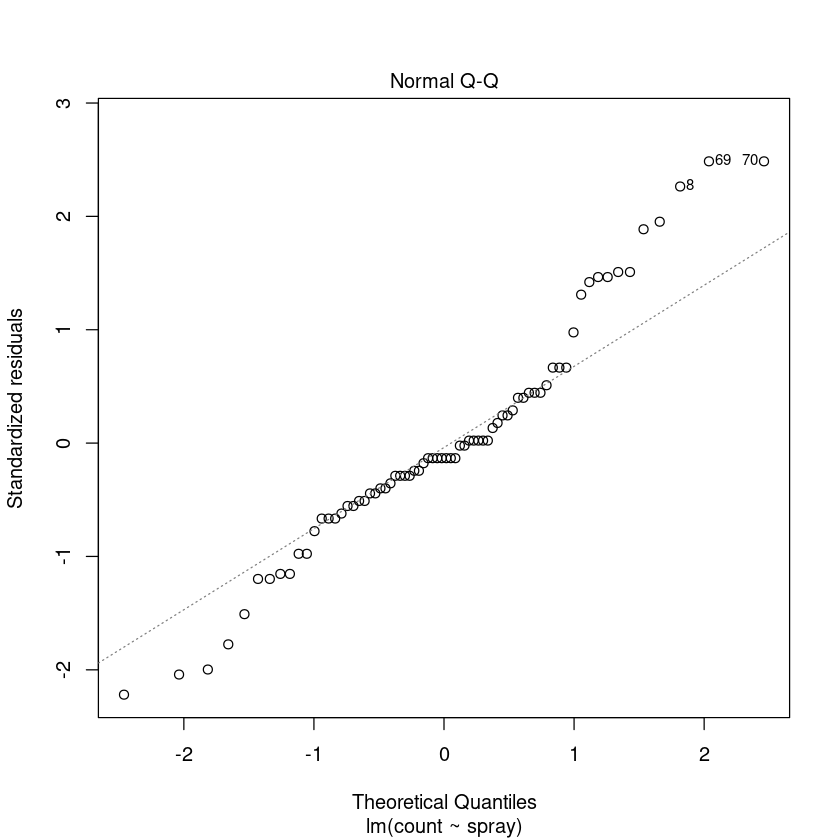

In [19]:
plot(model_no_outliers, which = 2)
plot(model_1, which = 2)

<b>(f)</b> ¿Cual de los dos modelos es mejor en terminos de R2 ajustada y el estadistico F?

In [20]:
summary(model_no_outliers)


Call:
lm(formula = count ~ spray, data = InsectSprays_no_outliers)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1429 -1.0682  0.0000  0.8571  3.0000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.4000     0.6909  20.843  < 2e-16 ***
sprayA       -0.4000     0.9355  -0.428   0.6709    
sprayB        1.7429     0.9046   1.927   0.0602 .  
sprayC      -12.7636     0.8332 -15.318  < 2e-16 ***
sprayD      -10.1273     0.8332 -12.154 5.79e-16 ***
sprayE      -10.9000     0.8223 -13.255  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.545 on 46 degrees of freedom
Multiple R-squared:  0.9392,	Adjusted R-squared:  0.9326 
F-statistic: 142.1 on 5 and 46 DF,  p-value: < 2.2e-16


<b>Modelo_1:</b> <br>
Multiple R-squared:  $0.7244$,	Adjusted R-squared:  $0.7036$ <br>
F-statistic:  $34.7$ on 5 and 66 DF,  p-value: < $2.2e-16$<br>
<br>
<b>No Outliers:</b> <br>
Multiple R-squared:  $0.9392$,	Adjusted R-squared:  $0.9326$ <br>
F-statistic: $142.1$ on 5 and 46 DF,  p-value: < $2.2e-16$ <br>

* El modelo sin los datos atipicos resulta ser mejor, como indica el R2 ajustado. El p-value para el estadistico F es pequeño para ambos modelos.


<b> Describimos el mejor modelo obtenido: </b>

* En este, el modelo propuesto es:
$$ count = 14.4 - 0.4 * sprayA + 1.7429 * sprayB - 12.7636 * sprayC - 10.1273 * sprayD - 10.9000 * sprayE $$
* el cual es significativo debido al valor pequeño del $p-value$ <br>
* donde el $incecticida \hspace{1mm} C$ tiene el mayor impacto en la disminución del numero de mosquitos, ademas de con un nivel de significancia de $***$, aunque no muy por detrás queda el $incecticida \hspace{1mm} E$ 

<b>(g)</b> Después de analizar los resultados desarrolle sus conclusiones y sugerencias para un hipotético agricultor

* Mi sugerencia sería irse primero por utilizar el insecticida C, y como segunda opcion tener el E, ya que en todos los modelos estos demuestran ser los que tienen mas infuencia, ninguno muy por delante del otro, por lo que la segunda opcion tambien es viable.

<h2>Ejercicio 3 </h2>

En relación al ejercicio 2, comparar ambos modelos a través del criterio de
<b>Akaike</b>. Utilice la función $AIC$ y una implementación propia. ¿Es justa su comparación?

$$ AIC = -2l + 2p $$

In [28]:
aic_1 <- AIC(model_1)
aic_2 <- AIC(model_no_outliers)

print(paste("AIC model_1: ", aic_1))
print(paste("AIC model_n_o: ", aic_2))

[1] "AIC model_1:  408.849370088124"
[1] "AIC model_n_o:  200.427900477599"


In [29]:
#para calcular el AIC
aic_max <- function(model) {
  p <- length(coef(model))
  l <- sum(logLik(model))
  aic <- -2*l + 2*(p+1)

  return(aic)
}


aic_model_1 <- aic_max(model_1)
aic_model_2 <- aic_max(model_no_outliers)

print(paste("AIC modelo 1: ", aic_model_1))
print(paste("AIC model_n_o: ", aic_model_2))

[1] "AIC Modelo 1:  408.849370088124"
[1] "AIC Modelo 2:  200.427900477599"


* al ser el que tiene un AIC mas bajo, concluímos que el modelo sin los posibles datos atipicos $model\_no\_outliers$ es el mas adecuado
* obtuvimos los mismos valores, parece justa la comparacion